In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [131]:
#1
df = pd.read_excel("slr.xlsx")

In [132]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2068000270,20140805T000000,1400000,5,3.0,3850,14990,1.0,0,0,...,9,2290,1560,1964,0,98004,47.6425,-122.218,3010,15001
1,7732500700,20141126T000000,832500,4,2.5,3450,35100,2.0,0,0,...,10,3450,0,1987,0,98052,47.7302,-122.106,3110,35894
2,7851990240,20140717T000000,771150,4,3.5,3950,12320,2.0,0,0,...,10,3950,0,2001,0,98065,47.5414,-121.869,3920,11086
3,3423049269,20140513T000000,225000,4,1.5,1950,12559,1.5,0,0,...,6,1950,0,1939,0,98188,47.4364,-122.282,1950,9178
4,7852150200,20140923T000000,389950,3,2.5,1700,6396,2.0,0,0,...,7,1700,0,2003,0,98065,47.5333,-121.870,1700,4444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,774100355,20141103T000000,370000,2,2.0,2100,58488,2.0,0,0,...,9,2100,0,2005,0,98014,47.7200,-121.402,1440,59346
1997,2781280150,20140801T000000,190000,2,2.5,1100,1737,2.0,0,0,...,8,1100,0,2006,0,98055,47.4499,-122.189,1610,2563
1998,7338000150,20150129T000000,160000,2,1.0,1070,4200,1.0,0,0,...,6,1070,0,1983,0,98002,47.3336,-122.215,1150,4200
1999,6977000040,20140823T000000,625000,4,3.0,2190,12825,1.0,0,0,...,9,1520,670,1989,0,98034,47.7107,-122.229,3050,4673


# 2

In [134]:
df.shape

(2001, 21)

#2001 rows and 21 columns

In [136]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 21 columns):
id               2001 non-null int64
date             2001 non-null object
price            2001 non-null int64
bedrooms         2001 non-null int64
bathrooms        2001 non-null float64
sqft_living      2001 non-null int64
sqft_lot         2001 non-null int64
floors           2001 non-null float64
waterfront       2001 non-null int64
view             2001 non-null int64
condition        2001 non-null int64
grade            2001 non-null int64
sqft_above       2001 non-null int64
sqft_basement    2001 non-null int64
yr_built         2001 non-null int64
yr_renovated     2001 non-null int64
zipcode          2001 non-null int64
lat              2001 non-null float64
long             2001 non-null float64
sqft_living15    2001 non-null int64
sqft_lot15       2001 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 328.4+ KB


In [138]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.001000e+03,2.001000e+03,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,4.590975e+09,5.295997e+05,3.347326,2.036982,2037.556222,17846.464268,1.423788,0.004998,0.250375,3.449775,7.560220,1728.725637,308.830585,1966.890055,84.676162,98079.052474,47.561350,-122.215569,1956.869065,15241.781109
std,2.888947e+09,3.437001e+05,0.905982,0.753579,896.279579,47218.111461,0.501312,0.070534,0.807949,0.678676,1.154771,790.018690,459.259858,27.893851,402.134842,53.819947,0.137556,0.141858,673.478504,35224.009024
min,1.120040e+07,8.650000e+04,0.000000,0.500000,470.000000,844.000000,1.000000,0.000000,0.000000,1.000000,4.000000,470.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000,399.000000,980.000000
25%,2.114700e+09,3.170000e+05,3.000000,1.500000,1410.000000,5478.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1949.000000,0.000000,98033.000000,47.475800,-122.331000,1460.000000,5325.000000
50%,3.971701e+09,4.500000e+05,3.000000,2.000000,1890.000000,7919.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1969.000000,0.000000,98070.000000,47.573400,-122.233000,1820.000000,7800.000000
75%,7.346600e+09,6.295000e+05,4.000000,2.500000,2470.000000,11085.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1989.000000,0.000000,98118.000000,47.677500,-122.126000,2300.000000,10236.000000
max,9.839301e+09,4.208000e+06,10.000000,8.000000,13540.000000,715690.000000,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2014.000000,2015.000000,98199.000000,47.777500,-121.316000,5500.000000,560617.000000


In [139]:
df.median()

id               3.971701e+09
price            4.500000e+05
bedrooms         3.000000e+00
bathrooms        2.000000e+00
sqft_living      1.890000e+03
sqft_lot         7.919000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.520000e+03
sqft_basement    0.000000e+00
yr_built         1.969000e+03
yr_renovated     0.000000e+00
zipcode          9.807000e+04
lat              4.757340e+01
long            -1.222330e+02
sqft_living15    1.820000e+03
sqft_lot15       7.800000e+03
dtype: float64

In [140]:
#Above dataframes shows the five point summary including minimum, maximum, quartile range and median

In [141]:
df.bedrooms.value_counts()

3     931
4     622
2     258
5     140
1      21
6      20
7       6
10      1
8       1
0       1
Name: bedrooms, dtype: int64

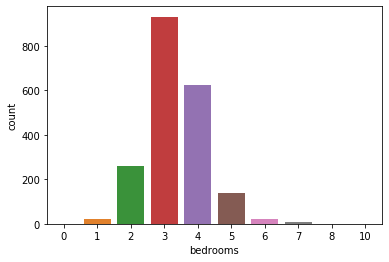

In [142]:
sns.countplot(df['bedrooms'], data=df)

#The most commonly found bedroom is of category 3

# 3

In [145]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.046067,-0.008742,0.027989,-0.019104,-0.170166,0.013573,-0.034633,-0.019026,-0.011210,0.019624,-0.007249,-0.024814,0.032740,-0.023684,-0.021553,0.002655,0.011887,-0.013188,-0.168697
price,-0.046067,1.000000,0.331621,0.517750,0.693583,0.071093,0.267308,0.175374,0.398001,0.058438,0.675114,0.594260,0.331332,0.057282,0.111798,-0.067074,0.300163,0.022749,0.614607,0.060176
bedrooms,-0.008742,0.331621,1.000000,0.537949,0.583630,0.030536,0.225645,0.004121,0.111334,0.035297,0.367351,0.465367,0.338474,0.195605,0.020597,-0.139310,-0.021214,0.140474,0.390792,0.044241
bathrooms,0.027989,0.517750,0.537949,1.000000,0.763300,0.108187,0.505607,0.048259,0.208771,-0.095841,0.640387,0.680268,0.319440,0.508222,0.057471,-0.225619,-0.001532,0.245916,0.566901,0.110893
sqft_living,-0.019104,0.693583,0.583630,0.763300,1.000000,0.178635,0.408165,0.065681,0.304301,-0.042267,0.760977,0.859035,0.473862,0.336718,0.048891,-0.181257,0.036894,0.247506,0.733595,0.176649
sqft_lot,-0.170166,0.071093,0.030536,0.108187,0.178635,1.000000,0.033654,0.026129,0.111682,-0.011389,0.135348,0.200118,0.004377,0.106683,0.028175,-0.133489,-0.203271,0.230905,0.115858,0.829377
floors,0.013573,0.267308,0.225645,0.505607,0.408165,0.033654,1.000000,0.017847,0.085403,-0.205611,0.451661,0.599709,-0.235054,0.455830,0.024690,-0.081234,-0.001628,0.173207,0.329255,0.022844
waterfront,-0.034633,0.175374,0.004121,0.048259,0.065681,0.026129,0.017847,1.000000,0.302664,-0.005199,0.045413,0.036455,0.065472,-0.031487,0.055056,0.046821,-0.033116,-0.043590,0.058957,0.031370
view,-0.019026,0.398001,0.111334,0.208771,0.304301,0.111682,0.085403,0.302664,1.000000,0.053492,0.268667,0.206799,0.238131,-0.008340,0.048004,0.050004,-0.019925,-0.044100,0.293417,0.123253
condition,-0.011210,0.058438,0.035297,-0.095841,-0.042267,-0.011389,-0.205611,-0.005199,0.053492,1.000000,-0.114326,-0.145487,0.167779,-0.335036,-0.045381,0.004145,-0.014178,-0.108380,-0.072390,-0.000504


# sqft_living 15, sqft_basement , sqft_above, grade, view, sqft_living, floors, bathrooms, bedrooms are most positively correlated columns with the target variable 

#Where as id, zipcode are negatively correleated features with target variable

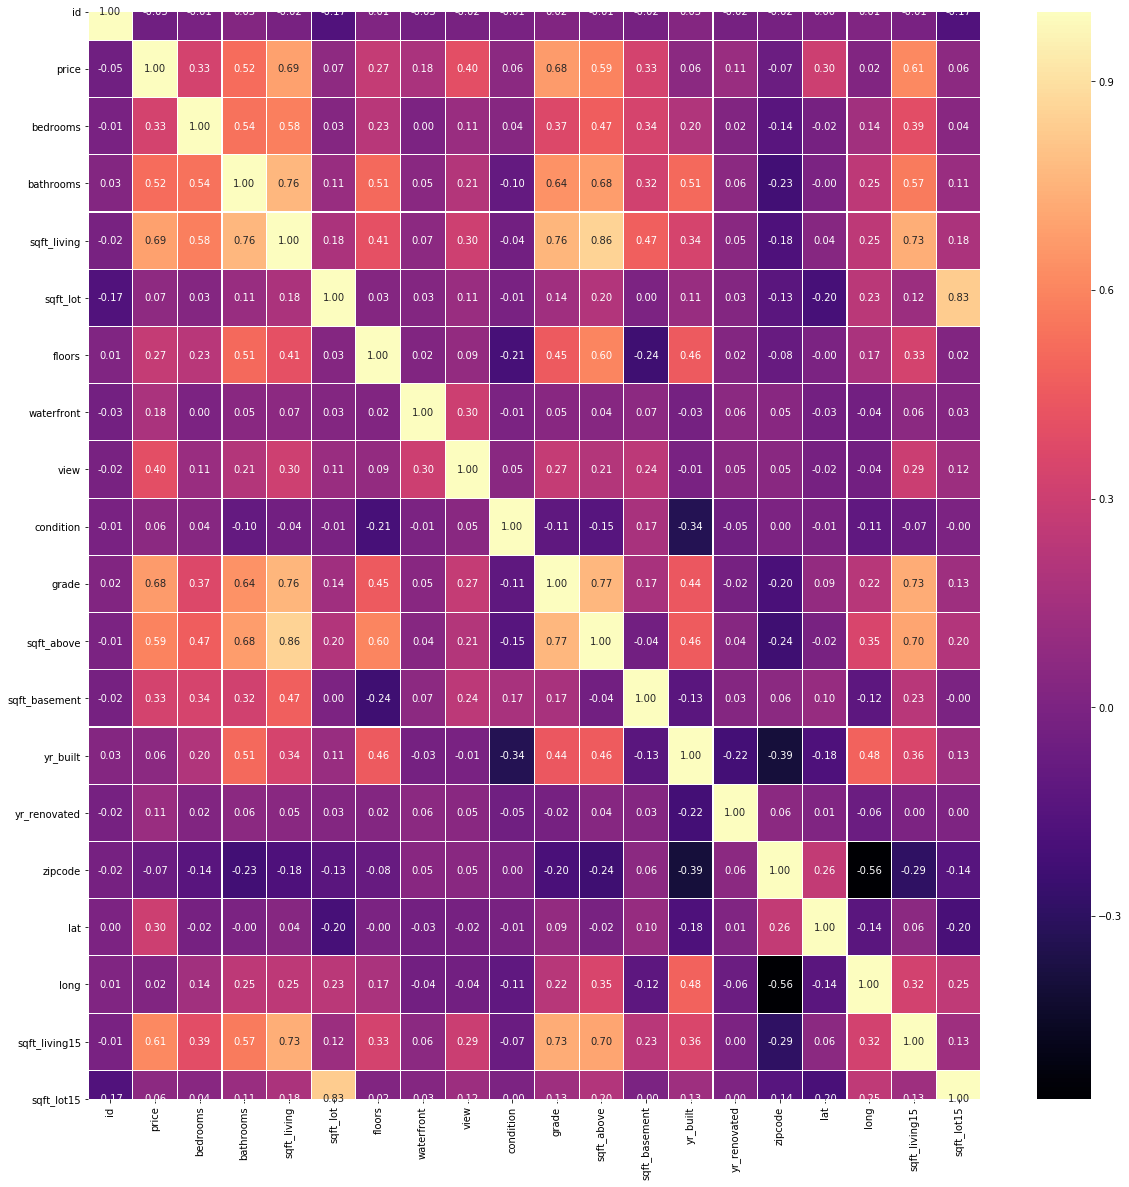

In [146]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.1, fmt= '.2f',cmap="magma")
plt.show()

# Based on the correlation plot we can remove the least correlated columns  like id , sqft_15 and long. However, I'll try to do this with backwared elimination and check how the model performs with all the variaables 

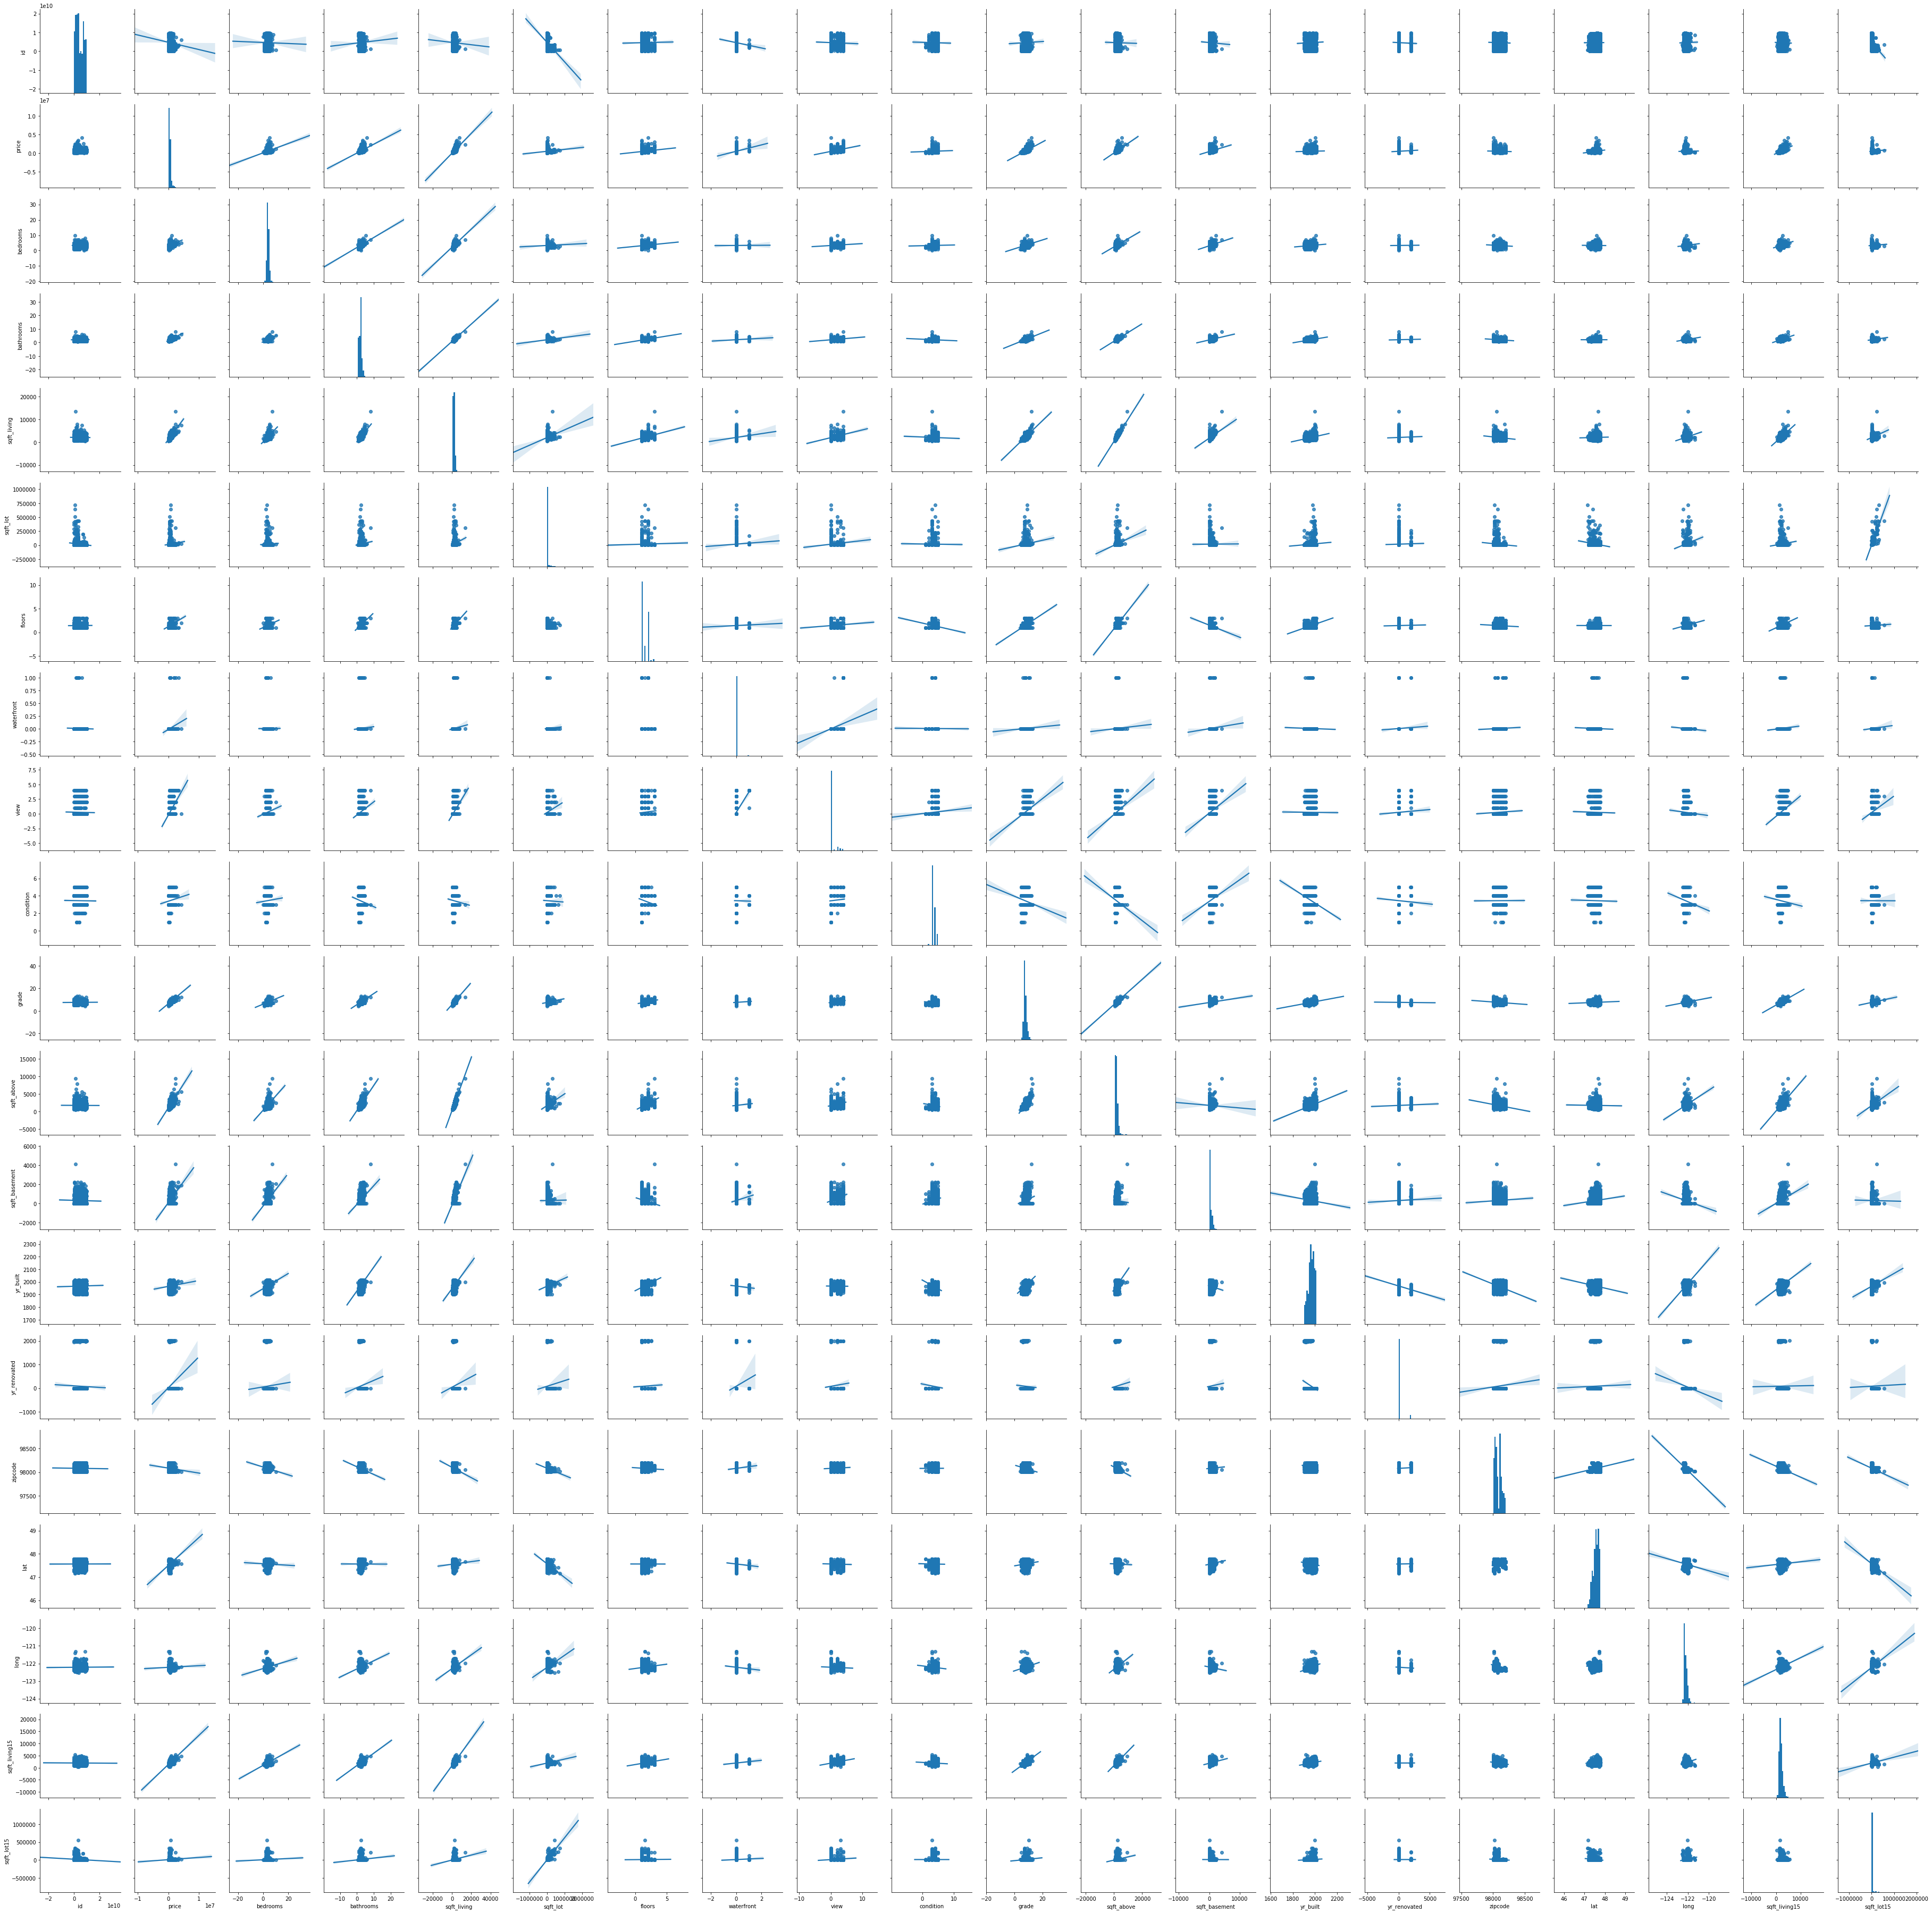

In [38]:
sns.pairplot(df, kind="reg")
plt.show()

In [ ]:
#Based on the pearson's correlatio we can select featues shown below: 

In [258]:
cor= df.corr()

In [259]:
#Correlation with output variable
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

price            1.000000
bathrooms        0.517750
sqft_living      0.693583
grade            0.675114
sqft_above       0.594260
sqft_living15    0.614607
Name: price, dtype: float64

Features bathrooms,sqft_living,grade,sqft_above,sqft_living15 are highly correlated with the output variable price. 
Hence we can drop all other features apart from these

In [264]:
# condition check for Multicollinearity
print(df[['bathrooms','sqft_living','grade','sqft_above','sqft_living15']].corr())

               bathrooms  sqft_living     grade  sqft_above  sqft_living15
bathrooms       1.000000     0.763300  0.640387    0.680268       0.566901
sqft_living     0.763300     1.000000  0.760977    0.859035       0.733595
grade           0.640387     0.760977  1.000000    0.765890       0.726386
sqft_above      0.680268     0.859035  0.765890    1.000000       0.700851
sqft_living15   0.566901     0.733595  0.726386    0.700851       1.000000


# 4

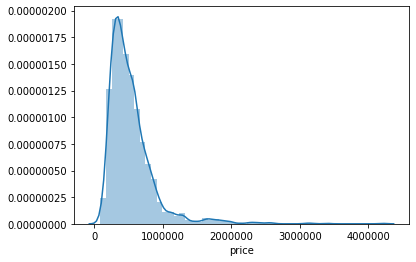

In [148]:
sns.distplot(df['price'])

#The target variable is normally distributed but howwever right skewed

#The kutrosis of the target varialbe is also high

In [151]:
#df['price1']= np.log1p(df['price'])

In [154]:
#sns.distplot(df['price1'])

#The skewness and kurtosis can be reduced by log tansformation, however, I'd prefer to do this after fitting the model. The reason for this is given in the last line or last question of this ipnyb file.

In [155]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [156]:
df.isnull().sum().sum()

0

#Hence there are no missing values

#checking for outliers

In [157]:
#remove data as it is catagorical variable

In [158]:
df1=df.drop('date', axis=1)

In [159]:
df1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2068000270,1400000,5,3.0,3850,14990,1.0,0,0,4,9,2290,1560,1964,0,98004,47.6425,-122.218,3010,15001
1,7732500700,832500,4,2.5,3450,35100,2.0,0,0,3,10,3450,0,1987,0,98052,47.7302,-122.106,3110,35894
2,7851990240,771150,4,3.5,3950,12320,2.0,0,0,3,10,3950,0,2001,0,98065,47.5414,-121.869,3920,11086
3,3423049269,225000,4,1.5,1950,12559,1.5,0,0,3,6,1950,0,1939,0,98188,47.4364,-122.282,1950,9178
4,7852150200,389950,3,2.5,1700,6396,2.0,0,0,3,7,1700,0,2003,0,98065,47.5333,-121.870,1700,4444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,774100355,370000,2,2.0,2100,58488,2.0,0,0,3,9,2100,0,2005,0,98014,47.7200,-121.402,1440,59346
1997,2781280150,190000,2,2.5,1100,1737,2.0,0,0,3,8,1100,0,2006,0,98055,47.4499,-122.189,1610,2563
1998,7338000150,160000,2,1.0,1070,4200,1.0,0,0,4,6,1070,0,1983,0,98002,47.3336,-122.215,1150,4200
1999,6977000040,625000,4,3.0,2190,12825,1.0,0,0,3,9,1520,670,1989,0,98034,47.7107,-122.229,3050,4673


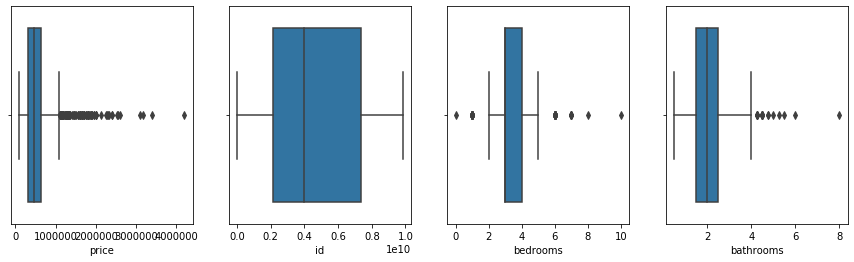

In [160]:
fig,ax = plt.subplots(1,4,figsize=(15,4))
sns.boxplot(df1['price'], ax=ax[0])
sns.boxplot(df1['id'], ax=ax[1])
sns.boxplot(df1['bedrooms'], ax=ax[2])
sns.boxplot(df1['bathrooms'], ax=ax[3])

#The above columns shows price, bedrooms, bathrooms have outliers

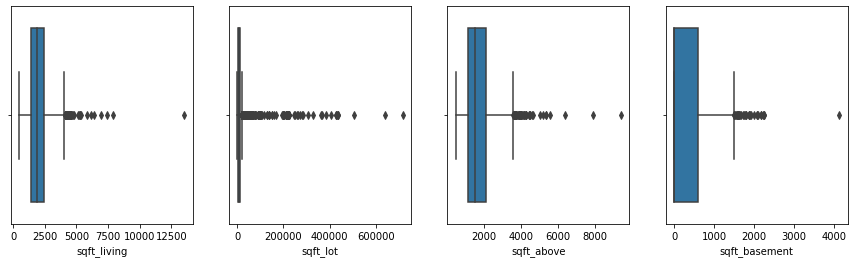

In [161]:
fig,ax = plt.subplots(1,4,figsize=(15,4))
sns.boxplot(df1['sqft_living'], ax=ax[0])
sns.boxplot(df1['sqft_lot'], ax=ax[1])
sns.boxplot(df1['sqft_above'], ax=ax[2])
sns.boxplot(df1['sqft_basement'], ax=ax[3])


#the features sqft_living, sqft_lot, sqft_above, sqft_basement have outliers 

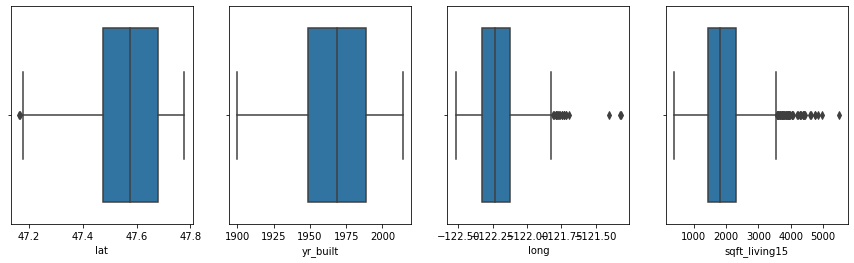

In [162]:
fig,ax = plt.subplots(1,4,figsize=(15,4))
sns.boxplot(df1['lat'], ax=ax[0])
sns.boxplot(df1['yr_built'], ax=ax[1])
sns.boxplot(df1['long'], ax=ax[2])
sns.boxplot(df1['sqft_living15'], ax=ax[3])


In [163]:
#the features long, sqft_living has outliers

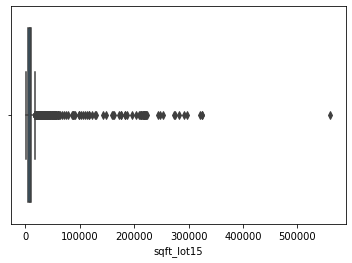

In [164]:
sns.boxplot(df1['sqft_lot15'])

In [165]:
# sqft_lot15 has outliers

# 5

In [176]:
x = df1.drop('price', 1)
y= df1['price']

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# 6

In [179]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

x_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     255.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:43:04   Log-Likelihood:                -27145.
No. Observations:                2001   AIC:                         5.433e+04
Df Residuals:                    1982   BIC:                         5.443e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.148e+07   9.15e+06      1.255      0.209   -6.46e+06    2.94e+07
id             -4.42e-06    1.5e-06     -2.949      0.003   -7.36e-06   -1.48e-06
bedrooms      -1.981e+04   6016.676     -3.293      0.001   -3.16e+04   -8011.705
bathrooms      3.835e+04   1.04e+04      3.693      0.000     1.8e+04    5.87e+04
sqft_living      85.6510      7.035     12.174      0.000      71.854      99.448
sqft_lot          0.1066      0.162      0.656      0.512      -0.212       0.425
floors        -9337.1194   1.21e+04     -0.772      0.440   -3.31e+04    1.44e+04
waterfront     4.205e+05   6.32e+04      6.650      0.000    2.96e+05    5.44e+05
view           5.851e+04   6003.672      9.745      0.000    4.67e+04    7.03e+04
condition      2.773e+04   6876.702      4.032      0.000    1.42e+04    4.12e+04
grade          9.695e+04   6808.293     14.240      0.000    8.36e+04     1.1e+05
sqft_above       60.4146      7.413      8.149      0.000      45.876      74.953
sqft_basement    25.2488      8.147      3.099      0.002       9.271      41.227
yr_built      -2463.7075    241.529    -10.200      0.000   -2937.385   -1990.030
yr_renovated     34.4087     11.239      3.062      0.002      12.368      56.450
zipcode        -670.8012    102.101     -6.570      0.000    -871.038    -470.564
lat            5.896e+05   3.41e+04     17.295      0.000    5.23e+05    6.56e+05
long          -2.489e+05    4.1e+04     -6.070      0.000   -3.29e+05   -1.68e+05
sqft_living15    54.0930     10.565      5.120      0.000      33.372      74.814
sqft_lot15       -0.2382      0.218     -1.090      0.276      -0.667       0.190
==============================================================================
Omnibus:                     1310.093   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38248.040
Skew:                           2.622   Prob(JB):                         0.00
Kurtosis:                      23.767   Cond. No.                     1.76e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [206]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score: {lin_reg.score(x_test, y_test)}')

Coefficients: [-5.31620459e-06 -1.63819871e+04  3.07299976e+04  8.65198102e+01
  2.11225880e-01  2.08953774e+04  3.93437487e+05  6.63734561e+04
  3.01609109e+04  1.00685463e+05  4.90699441e+01  3.74498661e+01
 -2.57352958e+03  2.82632431e+01 -5.91634373e+02  6.05396094e+05
 -1.96154288e+05  4.64896105e+01 -2.44749887e-01]
Intercept: 9589169.70995251
R^2 score: 0.7021580007018333
R^2 score: 0.6876793543651019


In [208]:
y_pred= lin_reg.predict(x_test)
y_pred

array([ 1.56836920e+06,  5.59516629e+05,  4.41430073e+05,  6.79685678e+05,
        4.80298202e+05,  4.52724657e+05,  9.64383641e+05,  8.60519416e+04,
        1.43109464e+06,  1.81633364e+05,  2.84621310e+05,  1.08465260e+06,
        3.77158396e+05,  7.03925794e+05,  1.93077967e+05,  2.20745251e+05,
        5.06153931e+05,  1.98484281e+05,  3.92136915e+05,  1.00087320e+06,
        3.83378786e+05,  2.54641160e+05,  2.61952905e+05,  5.07652007e+05,
        3.64577632e+05,  5.85089915e+05,  7.69692826e+05,  4.30053468e+05,
        8.69047310e+05,  4.27615492e+05,  1.65295095e+05,  1.67430441e+05,
        3.01354111e+05,  4.30826019e+05,  2.56552558e+05,  2.38498530e+05,
        6.83626130e+05,  1.70424133e+05,  1.05835005e+06,  6.45882202e+05,
        5.73434036e+03,  7.26997137e+05,  4.12003412e+04,  8.02245268e+05,
        2.90319411e+05,  8.00212068e+05,  6.28937065e+05,  4.32040070e+05,
        4.28987208e+05,  5.72693917e+05,  4.76058357e+05,  4.00035919e+05,
        2.57981093e+05,  

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
vif,1.045891,1.657266,3.415475,inf,3.279259,2.051009,1.10933,1.312324,1.214856,3.447528,inf,inf,2.531603,1.139249,1.684177,1.226501,1.887889,2.823993,3.303653


#As given by the model summary ,  The smallest eigenvalue is 1.9e-22. This might indicate that there are strong multicollinearity problems

# 8

By various feature selection method, we can improve the accuracy of the model

All the variables are given as input and eventually we remove the features one by one which is not creating impact to the model
Performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature

In [224]:
a=df1.drop('sqft_lot',1)

In [225]:
b=a.drop('sqft_lot15',1)

In [226]:
c=b.drop('floors',1)

In [227]:
df_new=c

In [234]:
x1 = df_new.drop('price', 1)
y1= df_new['price']

In [286]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

x_constant1 = sm.add_constant(x1)
lin_reg = sm.OLS(y1,x_constant1).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     307.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:17:24   Log-Likelihood:                -27146.
No. Observations:                2001   AIC:                         5.432e+04
Df Residuals:                    1985   BIC:                         5.441e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.196e+07   8.96e+06      1.336      0.182    -5.6e+06    2.95e+07
id            -4.224e-06   1.47e-06     -2.870      0.004   -7.11e-06   -1.34e-06
bedrooms       -1.96e+04   5990.618     -3.271      0.001   -3.13e+04   -7849.723
bathrooms       3.65e+04      1e+04      3.637      0.000    1.68e+04    5.62e+04
sqft_living      85.5741      6.980     12.260      0.000      71.885      99.263
waterfront     4.205e+05   6.32e+04      6.652      0.000    2.97e+05    5.44e+05
view           5.783e+04   5969.503      9.687      0.000    4.61e+04    6.95e+04
condition      2.763e+04   6869.166      4.022      0.000    1.42e+04    4.11e+04
grade          9.698e+04   6800.157     14.261      0.000    8.36e+04     1.1e+05
sqft_above       57.4444      6.603      8.699      0.000      44.494      70.395
sqft_basement    28.1280      7.291      3.858      0.000      13.829      42.427
yr_built      -2495.6893    237.803    -10.495      0.000   -2962.059   -2029.320
yr_renovated     34.2709     11.222      3.054      0.002      12.262      56.280
zipcode        -680.8103    101.529     -6.706      0.000    -879.925    -481.696
lat            5.923e+05   3.34e+04     17.738      0.000    5.27e+05    6.58e+05
long          -2.524e+05   4.01e+04     -6.296      0.000   -3.31e+05   -1.74e+05
sqft_living15    54.8685     10.504      5.224      0.000      34.269      75.468
==============================================================================
Omnibus:                     1316.369   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38822.967
Skew:                           2.637   Prob(JB):                         0.00
Kurtosis:                      23.924   Cond. No.                     1.76e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#Backward selection does not improve model accuracy to that extent

#Let's try with embededd method

In [237]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 45718747786.223747
Best score using built-in LassoCV: 0.002122


In [238]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 15 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

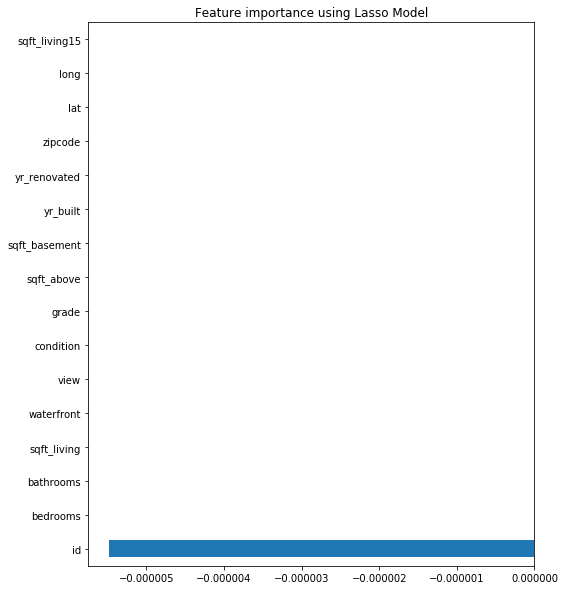

In [239]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

. RFE - Recursive Feature Elimination method

In [240]:
model = LinearRegression()

In [241]:
#Initializing RFE model
rfe = RFE(model, 11)

In [243]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True  True  True  True  True False False
 False  True  True False]
[6 1 1 1 1 1 1 1 1 1 2 5 3 1 1 4]


In [245]:
x.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')

In [250]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.723281


## inference : Optimized num of feature is 10 and its accuracy is 72.38 %

In [254]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(x_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['bedrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'long'],
      dtype='object')


So, the optimised number of features is 10 and the features are :: 'bedrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'long'

In [272]:
df1['price1']= np.log1p(df1['price'])

In [274]:
x = df1.drop('price1', 1)
y= df1['price1']

In [275]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.748687


## inference : Optimized num of feature is 10 and its accuracy is 74.86 %

However, if we use the base linear regression model with all the features included with just removing the skewness and kurtosis of the target varialbe, we get highest accuracy model

In [278]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

x_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 price1   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     783.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:00:29   Log-Likelihood:                 598.50
No. Observations:                2001   AIC:                            -1157.
Df Residuals:                    1981   BIC:                            -1045.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -21.7182      8.714     -2.492      0.013     -38.808      -4.628
id              2.78e-12   1.43e-12      1.944      0.052    -2.5e-14    5.59e-12
price          9.902e-07   2.14e-08     46.296      0.000    9.48e-07    1.03e-06
bedrooms          0.0167      0.006      2.900      0.004       0.005       0.028
bathrooms         0.0475      0.010      4.788      0.000       0.028       0.067
sqft_living   -1.431e-05   6.95e-06     -2.061      0.039   -2.79e-05   -6.92e-07
sqft_lot       6.452e-07   1.55e-07      4.172      0.000    3.42e-07    9.49e-07
floors            0.0757      0.012      6.569      0.000       0.053       0.098
waterfront       -0.0785      0.061     -1.289      0.198      -0.198       0.041
view              0.0083      0.006      1.410      0.159      -0.003       0.020
condition         0.0447      0.007      6.794      0.000       0.032       0.058
grade             0.0682      0.007     10.021      0.000       0.055       0.082
sqft_above    -3.202e-05   7.18e-06     -4.461      0.000   -4.61e-05   -1.79e-05
sqft_basement  1.773e-05   7.78e-06      2.280      0.023    2.48e-06     3.3e-05
yr_built         -0.0011      0.000     -4.833      0.000      -0.002      -0.001
yr_renovated    2.66e-05   1.07e-05      2.480      0.013    5.56e-06    4.76e-05
zipcode        8.595e-05   9.83e-05      0.875      0.382      -0.000       0.000
lat               0.8284      0.035     23.785      0.000       0.760       0.897
long              0.1013      0.039      2.569      0.010       0.024       0.179
sqft_living15  6.916e-05   1.01e-05      6.829      0.000    4.93e-05     8.9e-05
sqft_lot15     1.212e-07   2.08e-07      0.582      0.560   -2.87e-07    5.29e-07
==============================================================================
Omnibus:                      990.776   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13055.873
Skew:                          -1.998   Prob(JB):                         0.00
Kurtosis:                      14.859   Cond. No.                     3.26e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.55e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [279]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score: {lin_reg.score(x_test, y_test)}')

Coefficients: [ 3.51771976e-12  9.47507800e-07  1.85347874e-02  5.04082989e-02
 -1.71980956e-05  5.72266841e-07  6.84850255e-02 -2.16076707e-01
  8.60274599e-03  4.55834870e-02  7.41865521e-02 -2.23818129e-05
  5.18371734e-06 -1.36605109e-03  3.11458908e-05  1.54868206e-04
  8.19549678e-01  1.10065324e-01  6.18105496e-05  2.06301531e-07]
Intercept: -26.55943286242564
R^2 score: 0.8780201917244697
R^2 score: 0.8867812631280942


## inference : The best accurate model that I can build is with the accuracy of 88.6 % on the test data and 87.8 on train data resulting that overfit,underfit conditions are minimal and hence best fit model 

# 7



By doing appropriate feature selection using RFE technique impacted the most change on the model as the accuarcy has improved to 72 %

As seen above using RFE the best features affecting target variable are 'bedrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long' 

#Hence in business terms those houses with bedrooms, waterfront, view, condition, grade, sqft_above, sqft_basement, lat, long positions, and sqft_living areas determine the pricel. 

the risk of my intepretation is that if the skewness and kurtosis of the target variable and then directly apply the model on the data . The accuracy is improved way beyond 88 % as adjusted r-squred values shows 1.00 in ols summary.